In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
# Set random seed for reproducibility
np.random.seed(42)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate dummy data
def generate_data(n_samples=1000):
    # Generate random features (A, B, C, D) - one-hot encoded
    
    features = np.zeros((n_samples, 4))
    
    feature_idx = np.random.randint(0, 4, n_samples)
    features[np.arange(n_samples), feature_idx] = 1
    
    # Generate corresponding target tokens (same as features for this toy example)
    targets = feature_idx
    
    return features, targets

# 2. Simple neuron class with fixed probability distributions
class SimpleNeuron:
    def __init__(self, firing_features):
        self.firing_features = firing_features
    
    def forward(self, features):
        # Initialize output probabilities
        n_samples = len(features)
        probs = np.zeros((n_samples, 4))
        
        # For each sample
        for i in range(n_samples):
            feature_idx = np.where(features[i] == 1)[0][0]
            
            if feature_idx in self.firing_features:
                # If feature causes firing, distribute probability uniformly over firing features
                probs[i, self.firing_features] = 1.0 / len(self.firing_features)
            else:
                # If feature doesn't cause firing, distribute over non-firing features
                non_firing = list(set(range(4)) - set(self.firing_features))
                probs[i, non_firing] = 1.0 / len(non_firing)
        
        return probs

# Generate random training data
features, targets = generate_data(10000)

print(f'Features_single:')
print(f'{features}')
print(f'Targets_single:')
print(f'{targets}\n')

# Create two neurons with different firing patterns
neuron_A = SimpleNeuron([0])  # Only fires for feature A
neuron_AB = SimpleNeuron([0, 1])  # Fires for features A and B
print(f'Neurons:')
print(f'Neuron A: {neuron_A}')
print(f'Neuron AB: {neuron_AB}\n')

# Get predictions for single examples
probs_A = neuron_A.forward(features)
probs_AB = neuron_AB.forward(features)
print(f'Probabilities:')
print(f'Neuron A:\n {probs_A}')
print(f'Neuron AB: {probs_AB}\n')

# Calculate losses
loss_A = -np.mean([np.log(max(p[t], 1e-10)) for p, t in zip(probs_A, targets)])
loss_AB = -np.mean([np.log(max(p[t], 1e-10)) for p, t in zip(probs_AB, targets)])
print(f'Losses:')
print(f'Neuron A: {loss_A}')
print(f'Neuron AB: {loss_AB}\n')

Features_single:
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
Targets_single:
[2 3 0 ... 1 1 0]

Neurons:
Neuron A: <__main__.SimpleNeuron object at 0x0000024320AF9DF0>
Neuron AB: <__main__.SimpleNeuron object at 0x000002431E8103E0>

Probabilities:
Neuron A:
 [[0.         0.33333333 0.33333333 0.33333333]
 [0.         0.33333333 0.33333333 0.33333333]
 [1.         0.         0.         0.        ]
 ...
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.33333333 0.33333333 0.33333333]
 [1.         0.         0.         0.        ]]
Neuron AB: [[0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]
 [0.5 0.5 0.  0. ]
 ...
 [0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]]

Losses:
Neuron A: 0.820004212261877
Neuron AB: 0.6931471805599453



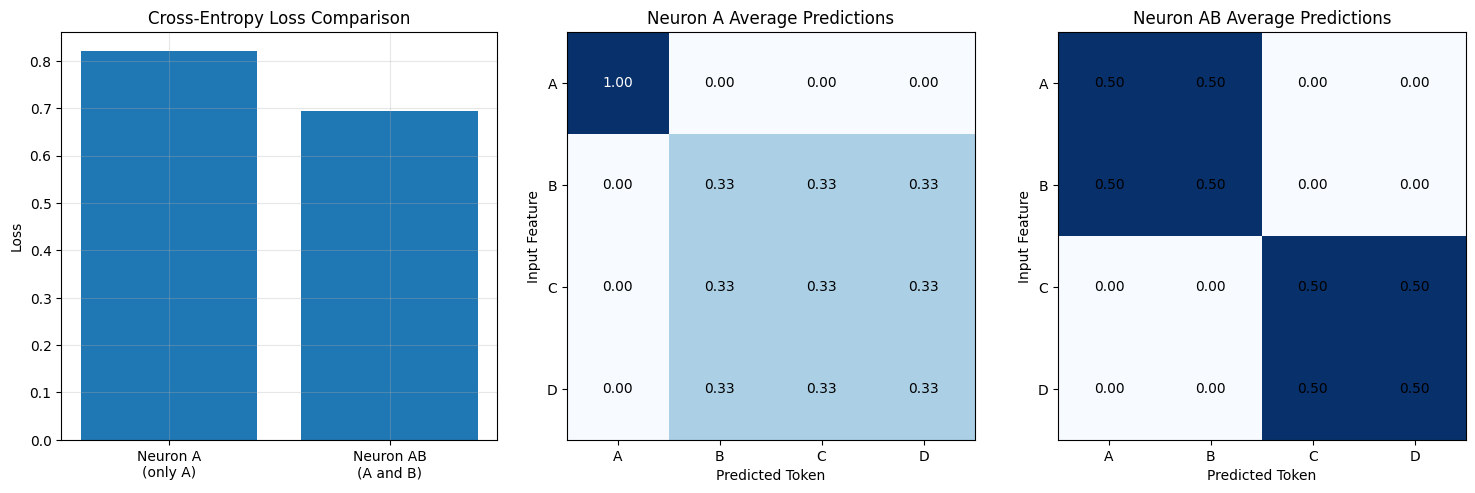


Final losses:
Neuron A loss: 0.820
Neuron AB loss: 0.693


In [ ]:
# Visualization
plt.figure(figsize=(15, 5))

# 1. Bar plot of losses
plt.subplot(131)
plt.bar(['Neuron A\n(only A)', 'Neuron AB\n(A and B)'], [loss_A, loss_AB])
plt.title('Cross-Entropy Loss Comparison')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

# For heatmaps, we'll use the average predictions for each feature
def get_average_predictions(probs, features):
    avg_preds = np.zeros((4, 4))
    for i in range(4):
        mask = features[:, i] == 1
        if np.any(mask):
            avg_preds[i] = np.mean(probs[mask], axis=0)
    return avg_preds

# 2. Heatmap of average prediction probabilities for Neuron A
plt.subplot(132)
feature_names = ['A', 'B', 'C', 'D']
avg_probs_A = get_average_predictions(probs_A, features)
plt.imshow(avg_probs_A, cmap='Blues')
plt.title('Neuron A Average Predictions')
plt.xlabel('Predicted Token')
plt.ylabel('Input Feature')
plt.xticks(range(4), feature_names)
plt.yticks(range(4), feature_names)
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{avg_probs_A[i,j]:.2f}', 
                ha='center', va='center',
                color='white' if avg_probs_A[i,j] > 0.5 else 'black')

# 3. Heatmap for Neuron AB
plt.subplot(133)
avg_probs_AB = get_average_predictions(probs_AB, features)
plt.imshow(avg_probs_AB, cmap='Blues')
plt.title('Neuron AB Average Predictions')
plt.xlabel('Predicted Token')
plt.ylabel('Input Feature')
plt.xticks(range(4), feature_names)
plt.yticks(range(4), feature_names)
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{avg_probs_AB[i,j]:.2f}', 
                ha='center', va='center',
                color='white' if avg_probs_AB[i,j] > 0.5 else 'black')

plt.tight_layout()
plt.show()

print(f"\nFinal losses:")
print(f"Neuron A loss: {loss_A:.3f}")
print(f"Neuron AB loss: {loss_AB:.3f}")